<a href="https://colab.research.google.com/github/Nikithasanju/Artificial-intelligence-and-machine-learning/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))
#--> (0 to 255) convert to (0 to 1)

In [ ]:
train = train_gen. flow_from_directory('/content/dataset/Training',
                               target_size=(120, 120),
                                      class_mode='categorical',
                                   batch_size=8)
ftest = test_gen.flow_from_directory('/content/dataset/Testing',
                                    target_size=(120, 120),
                                     class_mode='categorical',
                                     batch_size=8)




Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# CNN

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/I1rgEV.jpg',target_size=(120,120))

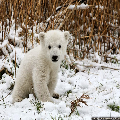

In [ ]:
img

In [ ]:
img = image.img_to_array(img)
img

array([[[179., 149., 121.],
        [151., 118.,  85.],
        [135., 100.,  60.],
        ...,
        [ 89.,  62.,  32.],
        [ 55.,  28.,   7.],
        [ 44.,  25.,  10.]],

       [[144., 125., 108.],
        [157., 127.,  99.],
        [ 73.,  47.,  20.],
        ...,
        [ 85.,  58.,  28.],
        [ 66.,  36.,  10.],
        [ 45.,  26.,   9.]],

       [[160., 138., 115.],
        [ 85.,  53.,  32.],
        [ 91.,  71.,  46.],
        ...,
        [ 72.,  48.,  24.],
        [ 86.,  53.,  22.],
        [ 65.,  47.,  23.]],

       ...,

       [[226., 229., 234.],
        [229., 228., 234.],
        [240., 243., 248.],
        ...,
        [114., 114., 114.],
        [100., 100.,  98.],
        [113., 114., 109.]],

       [[226., 229., 234.],
        [232., 233., 237.],
        [219., 218., 223.],
        ...,
        [ 43.,  35.,  32.],
        [159., 153., 139.],
        [119., 113.,  97.]],

       [[229., 232., 237.],
        [232., 233., 237.],
        [185., 1

In [ ]:
img = np.expand_dims(img,axis=0)
img

array([[[[179., 149., 121.],
         [151., 118.,  85.],
         [135., 100.,  60.],
         ...,
         [ 89.,  62.,  32.],
         [ 55.,  28.,   7.],
         [ 44.,  25.,  10.]],

        [[144., 125., 108.],
         [157., 127.,  99.],
         [ 73.,  47.,  20.],
         ...,
         [ 85.,  58.,  28.],
         [ 66.,  36.,  10.],
         [ 45.,  26.,   9.]],

        [[160., 138., 115.],
         [ 85.,  53.,  32.],
         [ 91.,  71.,  46.],
         ...,
         [ 72.,  48.,  24.],
         [ 86.,  53.,  22.],
         [ 65.,  47.,  23.]],

        ...,

        [[226., 229., 234.],
         [229., 228., 234.],
         [240., 243., 248.],
         ...,
         [114., 114., 114.],
         [100., 100.,  98.],
         [113., 114., 109.]],

        [[226., 229., 234.],
         [232., 233., 237.],
         [219., 218., 223.],
         ...,
         [ 43.,  35.,  32.],
         [159., 153., 139.],
         [119., 113.,  97.]],

        [[229., 232., 237.],
       

Final output

In [ ]:
b=np.argmax(model.predict(img))
if(b==3):
  b = 'a bear'
else:
  b = 'not a bear'
print("Our model says it is ",b)

1/1 [==============================] - 0s 320ms/step
Our model says it is  not a bear
